<a href="https://colab.research.google.com/github/Gordon256/StaMPS/blob/master/Copy_of_Forecast_and_Restrospective_Geoglows_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirements

### Dependencies

In [ ]:
library(httr)
library(jsonlite)
library(readr)
library(dplyr)
library(ggplot2)
library(dplyr)
library(tidyr)



### Global Variables

In [ ]:
ENDPOINT <- 'https://geoglows.ecmwf.int/api/v2/'


## Forecast

### Forecast Median

In [ ]:
# Define the base URL and the reach_id
BASE_URL <- 'https://geoglows.ecmwf.int/api/v2/forecast/'
reach_id <- 160263903  # Replace with a valid reach_id

In [ ]:
# Construct the full URL
url <- paste0(BASE_URL, reach_id)

# Make the GET request to the API
response <- GET(url)

# Step 3: Save the response content to a file
csv_file <- tempfile(fileext = ".csv")
writeBin(content(response, "raw"), csv_file)


# Step 4: Read the CSV file into R
forecast_data <- read_csv(csv_file)


# Step 5: Optionally, clean up the temporary file
unlink(csv_file)

# View the data
print(forecast_data)

Rows: 120 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (3): flow_uncertainty_upper, flow_median, flow_uncertainty_lower
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 120 × 4
   datetime            flow_uncertainty_upper flow_median flow_uncertainty_lower
   <dttm>                               <dbl>       <dbl>                  <dbl>
 1 2024-06-20 00:00:00                   56.5        56.5                   56.5
 2 2024-06-20 03:00:00                   56.3        56.3                   56.3
 3 2024-06-20 06:00:00                   56.1        56.1                   56.1
 4 2024-06-20 09:00:00                   55.9        55.9                   55.8
 5 2024-06-20 12:00:00                   55.6        55.6                   55.6
 6 2024-06-20 15:00:00                   55.2        55.2                   55.2
 7 2024-06-20 18:00:00                   54.9        54.9                   54.9
 8 2024-06-20 21:00:00                   54.5        54.5                   54.4
 9 2024-06-21 00:00:00                   54.1        54                     54  
10 2024-06-21 03:00:00                   53.6        53.5                   53.5
# ℹ 110 

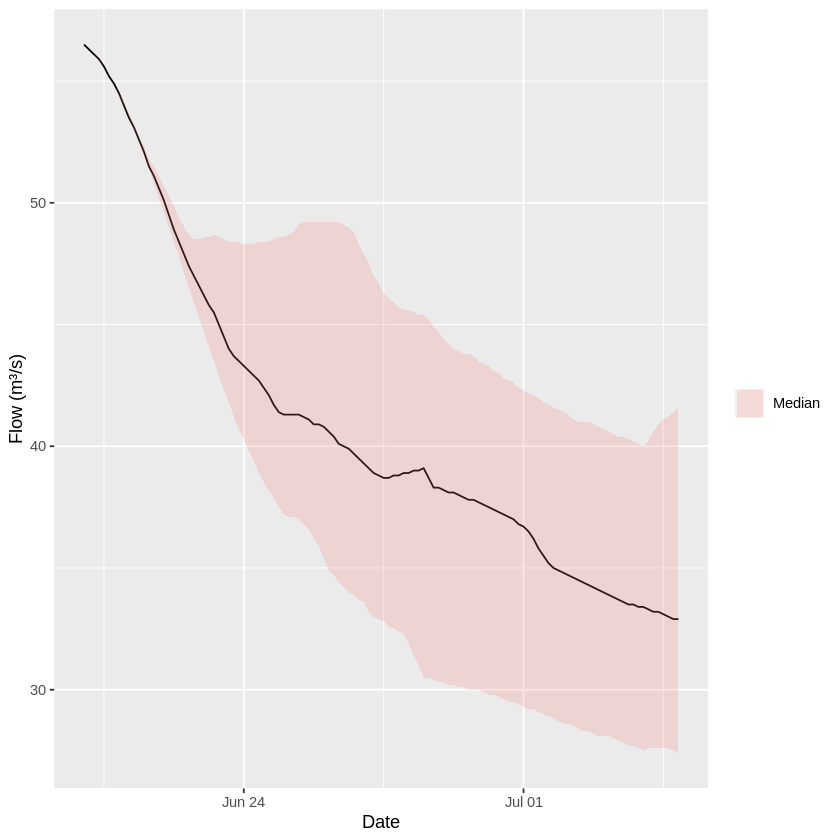

In [ ]:
ggplot(forecast_data, aes(x = datetime, y = flow_median, fill = "Median")) +
  geom_line() +
  geom_ribbon(aes(ymin = flow_uncertainty_lower, ymax = flow_uncertainty_upper), alpha = 0.2, color = NA) +
  labs(x = "Date", y = "Flow (m³/s)", fill = NULL)


### Forecast ensembles

In [ ]:
BASE_URL <- 'https://geoglows.ecmwf.int/api/v2/forecastensembles/'
reach_id <- 160263903  # Replace with a valid reach_id


In [ ]:
# Construct the full URL
url <- paste0(BASE_URL, reach_id)

# Make the GET request to the API
response <- GET(url)

# Step 3: Save the response content to a file
csv_file <- tempfile(fileext = ".csv")
writeBin(content(response, "raw"), csv_file)


# Step 4: Read the CSV file into R
forecast_ensemble_data <- read_csv(csv_file)


# Step 5: Optionally, clean up the temporary file
unlink(csv_file)

# View the data
print(forecast_ensemble_data)


Rows: 280 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (52): ensemble_01, ensemble_02, ensemble_03, ensemble_04, ensemble_05, ...
dttm  (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 280 × 53
   datetime            ensemble_01 ensemble_02 ensemble_03 ensemble_04
   <dttm>                    <dbl>       <dbl>       <dbl>       <dbl>
 1 2024-06-20 00:00:00        56.5        56.5        56.5        56.5
 2 2024-06-20 01:00:00        NA          NA          NA          NA  
 3 2024-06-20 02:00:00        NA          NA          NA          NA  
 4 2024-06-20 03:00:00        56.3        56.3        56.3        56.3
 5 2024-06-20 04:00:00        NA          NA          NA          NA  
 6 2024-06-20 05:00:00        NA          NA          NA          NA  
 7 2024-06-20 06:00:00        56.1        56.1        56.1        56.1
 8 2024-06-20 07:00:00        NA          NA          NA          NA  
 9 2024-06-20 08:00:00        NA          NA          NA          NA  
10 2024-06-20 09:00:00        55.9        55.8        55.9        55.9
# ℹ 270 more rows
# ℹ 48 more variables: ensemble_05 <dbl>, ensemble_06 <dbl>, ensemble_07 <dbl>,
#   ensemble_08 <dbl>, ensemb

Warning message:
“Removed 40 rows containing missing values (`geom_line()`).”


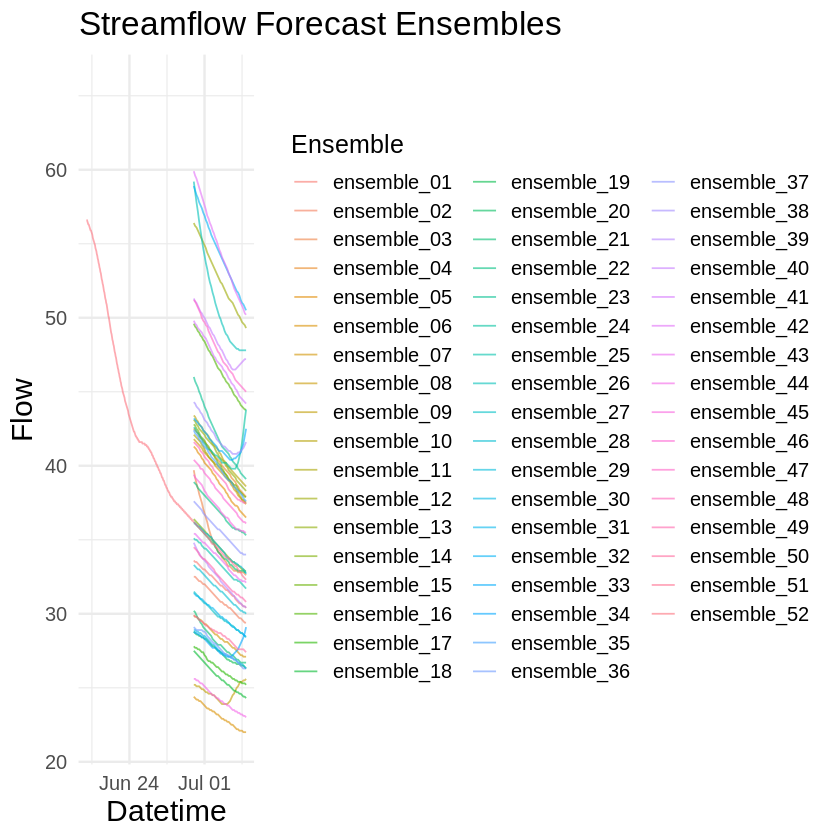

In [ ]:
# Step 6: Reshape the data for plotting
forecast_long <- forecast_ensemble_data %>%
  pivot_longer(cols = starts_with("ensemble_"), names_to = "ensemble", values_to = "flow")

# Step 7: Plot the data using ggplot2
ggplot(forecast_long, aes(x = datetime, y = flow, color = ensemble)) +
  geom_line(alpha = 0.6) +
  labs(title = "Streamflow Forecast Ensembles",
       x = "Datetime",
       y = "Flow",
       color = "Ensemble") +
  theme_minimal(base_size = 15) +
  theme(plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        )

### Forecast Stats

In [ ]:
BASE_URL <- 'https://geoglows.ecmwf.int/api/v2/forecaststats/'
reach_id <- 160263903  # Replace with a valid reach_id

In [ ]:
# Construct the full URL
url <- paste0(BASE_URL, reach_id)

# Make the GET request to the API
response <- GET(url)

# Step 3: Save the response content to a file
csv_file <- tempfile(fileext = ".csv")
writeBin(content(response, "raw"), csv_file)


# Step 4: Read the CSV file into R
forecast_stats_data <- read_csv(csv_file)


# Step 5: Optionally, clean up the temporary file
unlink(csv_file)

# View the data
print(forecast_stats_data)


Rows: 280 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): flow_max, flow_75p, flow_avg, flow_med, flow_25p, flow_min, high_res
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 280 × 8
   datetime            flow_max flow_75p flow_avg flow_med flow_25p flow_min
   <dttm>                 <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1 2024-06-20 00:00:00     56.5     56.5     56.5     56.5     56.5     56.5
 2 2024-06-20 01:00:00     NA       NA       NA       NA       NA       NA  
 3 2024-06-20 02:00:00     NA       NA       NA       NA       NA       NA  
 4 2024-06-20 03:00:00     56.3     56.3     56.3     56.3     56.3     56.3
 5 2024-06-20 04:00:00     NA       NA       NA       NA       NA       NA  
 6 2024-06-20 05:00:00     NA       NA       NA       NA       NA       NA  
 7 2024-06-20 06:00:00     56.1     56.1     56.1     56.1     56.1     56.1
 8 2024-06-20 07:00:00     NA       NA       NA       NA       NA       NA  
 9 2024-06-20 08:00:00     NA       NA       NA       NA       NA       NA  
10 2024-06-20 09:00:00     55.9     55.9     55.9     55.9     55.8     55.8
# ℹ 270 more rows
# ℹ 1 more variable: high_res <dbl>


Warning message:
“Removed 40 rows containing missing values (`geom_line()`).”


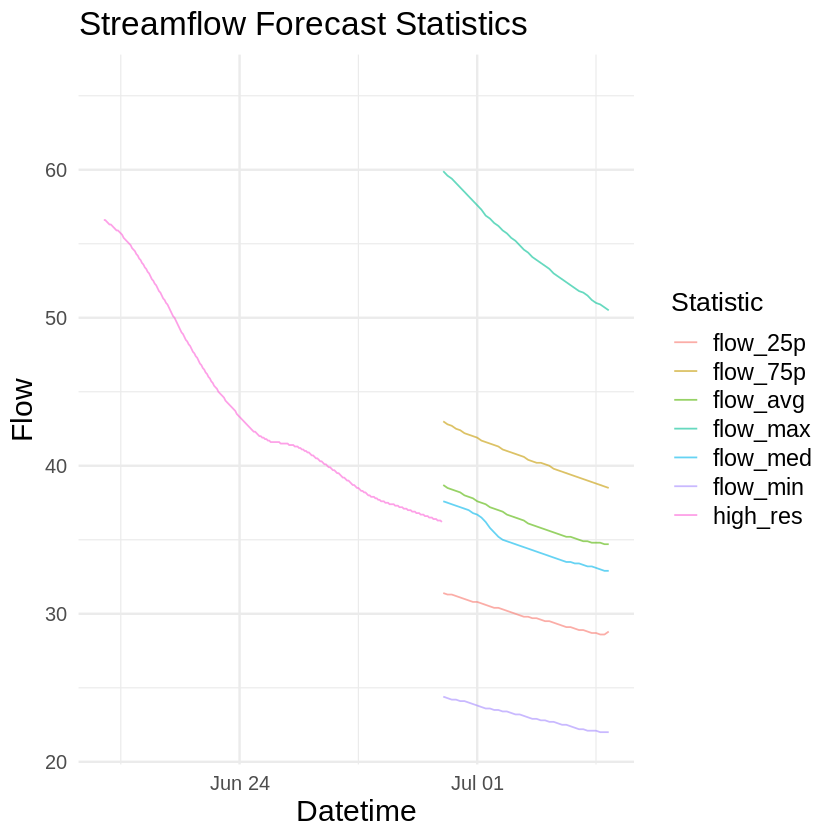

In [ ]:
# Reshape the data for plotting
forecast_long <- forecast_stats_data %>%
  pivot_longer(cols = c("flow_max", "flow_75p", "flow_avg", "flow_med", "flow_25p", "flow_min", "high_res"), names_to = "stat", values_to = "flow")

# Create the plot
ggplot(forecast_long, aes(x = datetime, y = flow, color = stat)) +
  geom_line(alpha = 0.6) +
  labs(title = "Streamflow Forecast Statistics",
       x = "Datetime",
       y = "Flow",
       color = "Statistic") +
  theme_minimal(base_size = 15) +
  theme(plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14))


## Restrospective Data

In [ ]:
BASE_URL <- 'https://geoglows.ecmwf.int/api/v2/retrospective/'
reach_id <- 160263903  # Replace with a valid reach_id

In [ ]:
# Construct the full URL
url <- paste0(BASE_URL, reach_id)

# Make the GET request to the API
response <- GET(url)

# Step 3: Save the response content to a file
csv_file <- tempfile(fileext = ".csv")
writeBin(content(response, "raw"), csv_file)


# Step 4: Read the CSV file into R
retrospective_data <- read_csv(csv_file)


# Step 5: Optionally, clean up the temporary file
unlink(csv_file)

# View the data
print(retrospective_data)

Rows: 30844 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): 160263903
date (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 30,844 × 2
   time       `160263903`
   <date>           <dbl>
 1 1940-01-01        1.58
 2 1940-01-02       10.6 
 3 1940-01-03       29.6 
 4 1940-01-04       57.2 
 5 1940-01-05       94.4 
 6 1940-01-06      135.  
 7 1940-01-07      205.  
 8 1940-01-08      328.  
 9 1940-01-09      471.  
10 1940-01-10      536.  
# ℹ 30,834 more rows


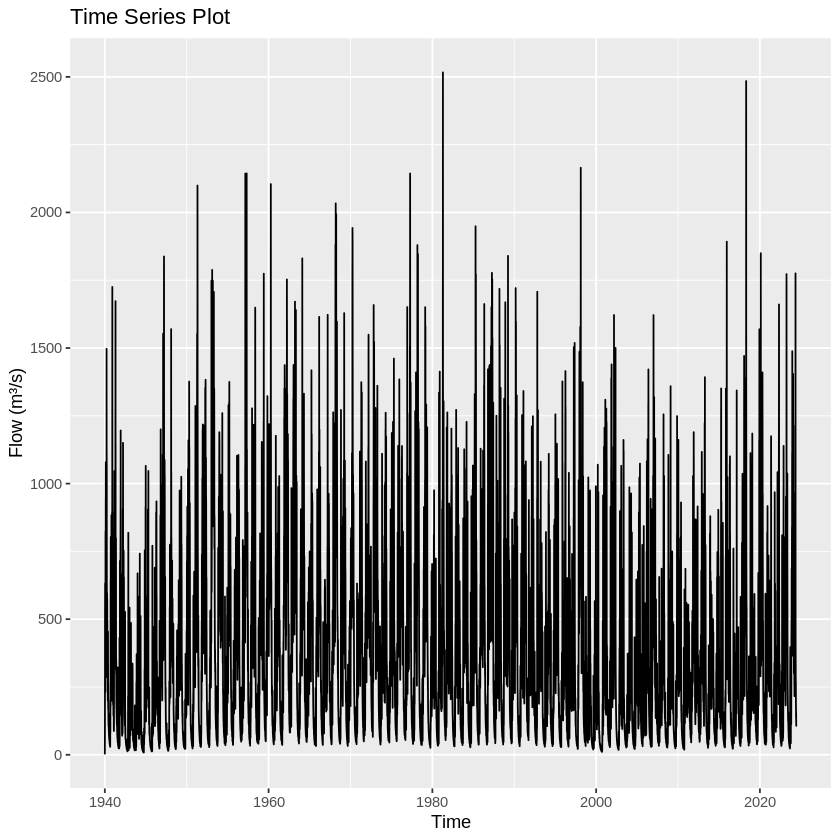

In [ ]:
ggplot(retrospective_data, aes(time, `160263903`)) +
  geom_line() +
  labs(title = "Time Series Plot",
       x = "Time",
       y = "Flow (m³/s)")
